In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
def get_idxs(group, date = None):

    """
    Looks for the different indexes and lists them and their info from the parameter file
    """

    if group == 'rare_feature_temp':
        idxs = glob.glob('results/rare_feature_temp/*')

    elif group == 'rare_feature_value':
        idxs = glob.glob('results/rare_feature_value/*')

    elif group == 'rare_time_temp':
        idxs = glob.glob('results/rare_time_temp/*')

    elif group == 'rare_time_value':
        idxs = glob.glob('results/rare_time_value/*')

    else:
        raise ValueError('Group not recognized')

    for i in idxs:
        print_dict = {}
        with open(glob.glob(i + '/*_params.txt')[0], 'r') as f:
            lines = f.readlines()
            for line in lines:
                print_dict[line.split(': ')[0]] = line.split(': ')[1].strip()
            
            if date is not None:
                if date in print_dict['time']:
                    print('\n\n' + i)
                    print(print_dict['time'])
                    print(print_dict['explainers'])
            else:
                print(print_dict)

# get_idxs('rare_feature_temp')
# get_idxs('rare_feature_value')
# get_idxs('rare_time_value')
# get_idxs('rare_time_value')



results/rare_feature_value/641720
2025-05-22 11:18:51
['MFF-FMA-G']
8
cuda:6
24


results/rare_feature_value/911194
2025-05-22 10:51:44
['MFF-FMA-G']
16
cuda:7
12


results/rare_feature_value/322180
2025-05-22 10:25:35
['MFF-FMA-G']
32
cuda:7
24


results/rare_feature_value/305062
2025-05-22 10:25:35
['MFF-FMA-G']
32
cuda:6
32


results/rare_feature_value/124184
2025-05-22 10:51:44
['MFF-FMA-G']
16
cuda:6
24


results/rare_feature_value/843743
2025-05-22 11:18:51
['MFF-FMA-G']
8
cuda:7
12


In [ ]:
def plot_three_masks(gb_mask:str, fma_mask:str, del_mask:str, setting:str='rare_feature_value', mask:str='MFF', optimizer:str='E'):

    gb_search_path = f'results/{setting}/{gb_mask}/{setting}_{gb_mask}_{mask}-GB*_fitted.pt'
    gb_paths = glob.glob(gb_search_path)
    gb_paths.sort()
    print(gb_paths)

    fma_search_path = f'results/{setting}/{fma_mask}/{setting}_{fma_mask}_{mask}-FMA*_fitted.pt'
    fma_paths = glob.glob(fma_search_path)
    fma_paths.sort()
    print(fma_paths)

    del_search_path = f'results/{setting}/{del_mask}/{setting}_{del_mask}_{mask}-D*_fitted.pt'
    del_paths = glob.glob(del_search_path)
    del_paths.sort()
    print(del_paths)

    true_search_path = f'results/{setting}/{gb_mask}/{setting}_{gb_mask}_{mask}-D*_true.pt'
    true_paths = glob.glob(true_search_path)
    true_paths.sort()
    print(true_paths)

    fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(16, 24), constrained_layout=True)
    
    for i in range(10):

        gb_mask = torch.load(gb_paths[i])
        fma_mask = torch.load(fma_paths[i])
        del_mask = torch.load(del_paths[i])
        true_mask = torch.load(true_paths[i])
        
        print(gb_paths[i])
        print(fma_paths[i])
        print(del_paths[i])
        print(true_paths[i])

        axes[i, 0].imshow(gb_mask[0].T.cpu().detach().numpy(), cmap='viridis',
            interpolation='nearest',
            aspect='auto',
            vmin=0,
            vmax=1)
        axes[i, 0].set_title(f'GB {i+1}')
        if i != 9:
            axes[i, 0].set_xticks([])
        axes[i, 1].imshow(fma_mask[0].T.cpu().detach().numpy(), cmap='viridis',
            interpolation='nearest',
            aspect='auto',
            vmin=0,
            vmax=1)
        axes[i, 1].set_title(f'FMA {i+1}')
        if i != 9:
            axes[i, 1].axis('off')
        else:
            axes[i, 1].set_yticks([])
        axes[i, 2].imshow(del_mask[0].T.cpu().detach().numpy(), cmap='viridis',
            interpolation='nearest',
            aspect='auto',
            vmin=0,
            vmax=1)
        axes[i, 2].set_title(f'DEL {i+1}')
        if i != 9:
            axes[i, 2].axis('off')
        else:
            axes[i, 2].set_yticks([])
        axes[i, 3].imshow(true_mask[0].T.cpu().detach().numpy(), cmap='viridis',
            interpolation='nearest',
            aspect='auto',
            vmin=0,
            vmax=1)
        axes[i, 3].set_title(f'True {i+1}')
        if i != 9:
            axes[i, 3].axis('off')
        else:
            axes[i, 3].set_yticks([])

    fig.colorbar(axes[0, 0].imshow(gb_mask[0].T.cpu().detach().numpy(), cmap='viridis',
        interpolation='nearest',
        aspect='auto',
        vmin=0,
        vmax=1), ax=axes[:, 3], shrink=0.6)

['results/rare_feature_value/674608/rare_feature_value_674608_MFF-GB-E_cv0_fitted.pt', 'results/rare_feature_value/674608/rare_feature_value_674608_MFF-GB-E_cv1_fitted.pt', 'results/rare_feature_value/674608/rare_feature_value_674608_MFF-GB-E_cv2_fitted.pt', 'results/rare_feature_value/674608/rare_feature_value_674608_MFF-GB-E_cv3_fitted.pt', 'results/rare_feature_value/674608/rare_feature_value_674608_MFF-GB-E_cv4_fitted.pt', 'results/rare_feature_value/674608/rare_feature_value_674608_MFF-GB-E_cv5_fitted.pt', 'results/rare_feature_value/674608/rare_feature_value_674608_MFF-GB-E_cv6_fitted.pt', 'results/rare_feature_value/674608/rare_feature_value_674608_MFF-GB-E_cv7_fitted.pt', 'results/rare_feature_value/674608/rare_feature_value_674608_MFF-GB-E_cv8_fitted.pt', 'results/rare_feature_value/674608/rare_feature_value_674608_MFF-GB-E_cv9_fitted.pt']
['results/rare_feature_value/674608/rare_feature_value_674608_MFF-FMA-E_cv0_fitted.pt', 'results/rare_feature_value/674608/rare_feature_val

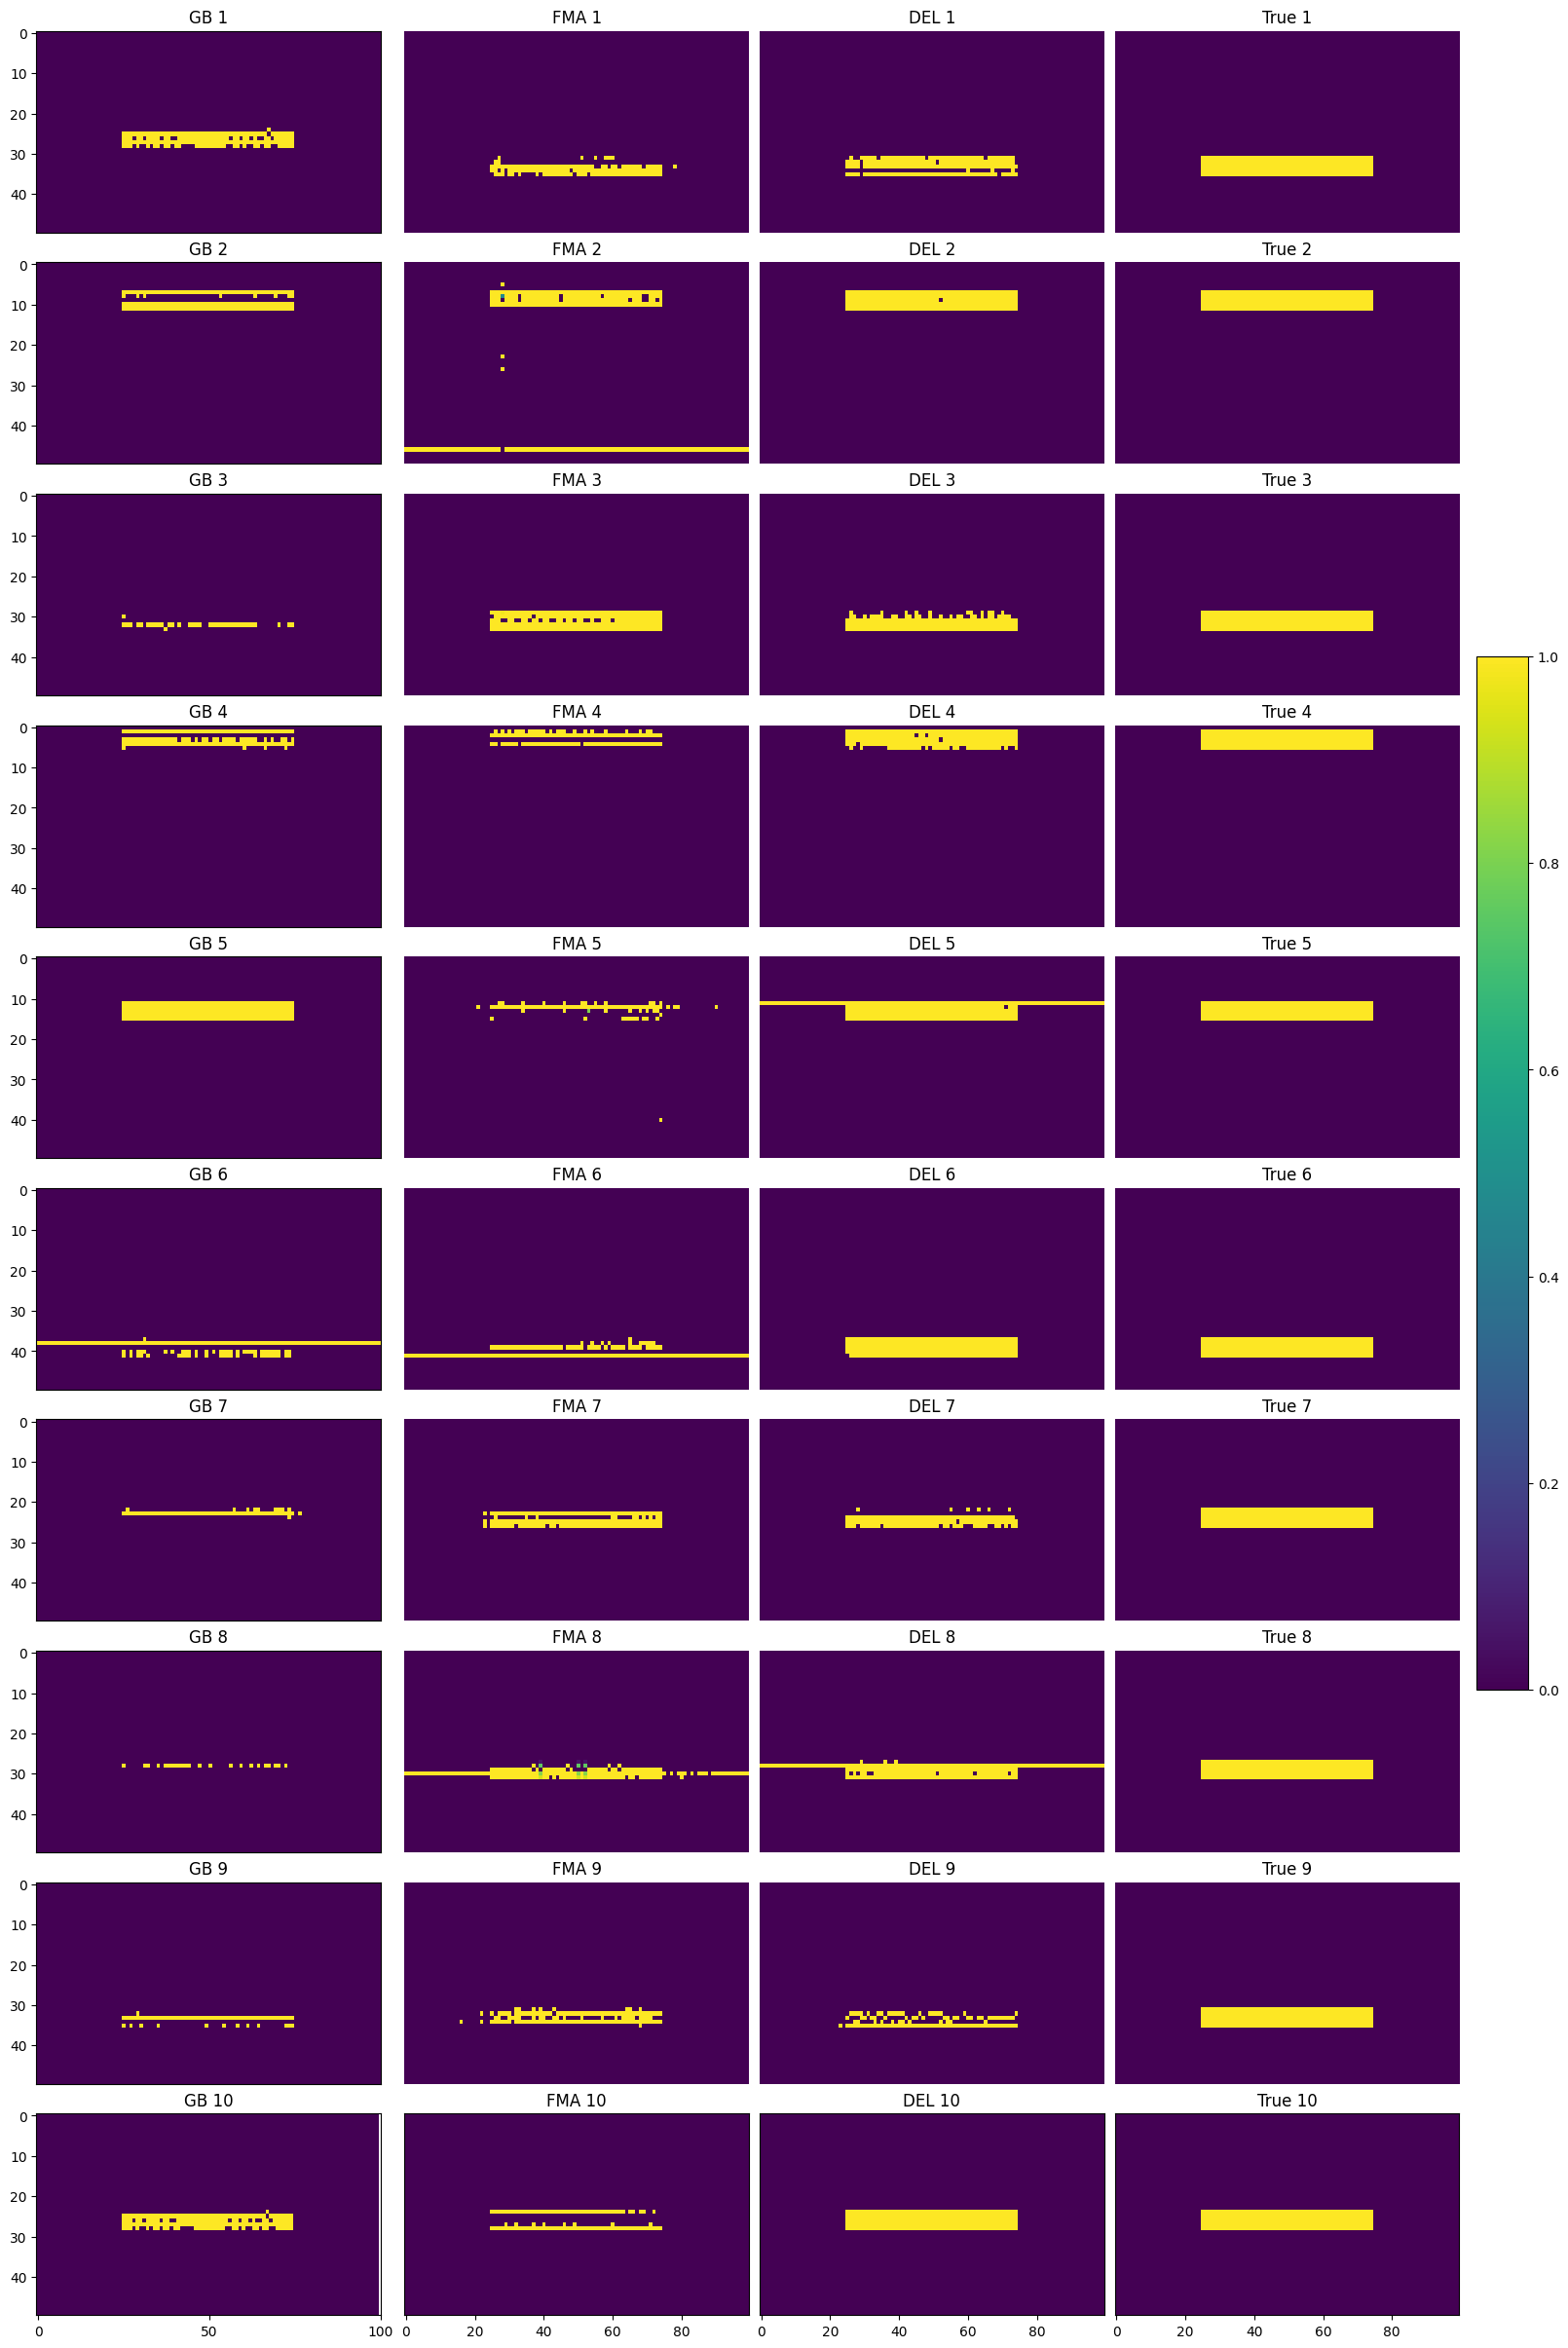

In [65]:
plot_three_masks(gb_mask='674608', fma_mask='674608', del_mask='674608')